<a href="https://colab.research.google.com/github/mona-gomaa/Ai_computer_vision/blob/computer_vision/img_cut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [ ]:

# Load the image
image = cv2.imread('image.jpeg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)




<BarContainer object of 256 artists>

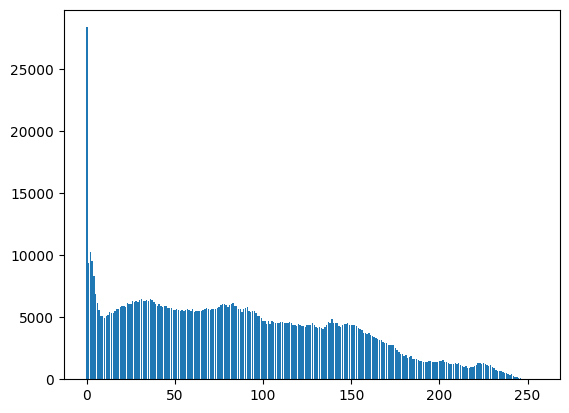

In [ ]:
hist,bins = np.histogram(image.ravel(),bins=256,range=[0,255])#ravel() = flatten()

plt.bar(x=range(256), height=hist)

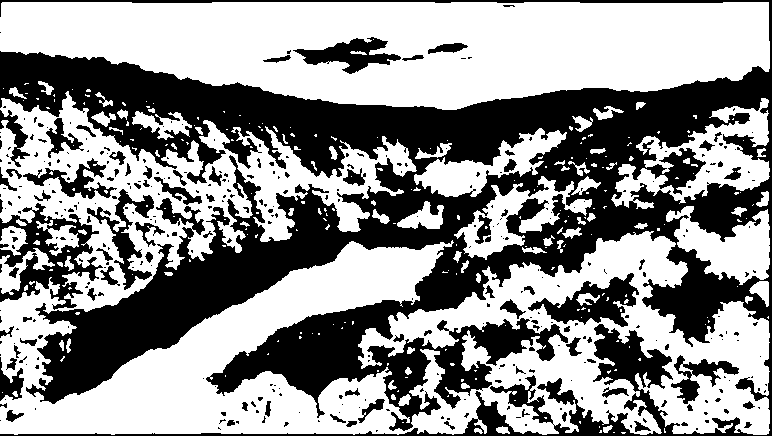

In [ ]:

adaptive_threshold = cv2.adaptiveThreshold(
    blurred_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 111, 2
)
cv2_imshow(adaptive_threshold)

no of shape 1


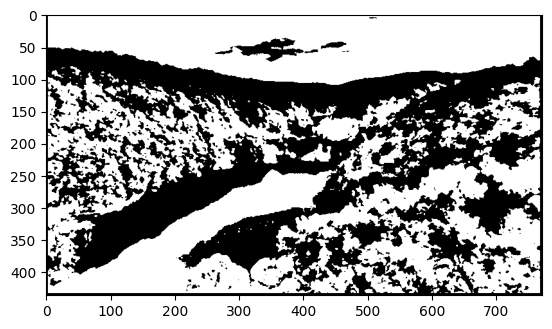

In [ ]:
# # Perform edge detection using the Canny edge detector
# edges = cv2.Canny(blurred_img, threshold1=30, threshold2=70)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(blurred_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("no of shape {0}".format(len(contours)))

for cont in contours:
    rect = cv2.minAreaRect(cont)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(adaptive_threshold,[box],0,(0,255,0),3)

plt.imshow(img,cmap='gray')

In [ ]:
# # Importing necessary libraries
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage.color import rgb2gray
# from skimage import data
# from skimage.filters import gaussian
# from skimage.segmentation import active_contour

# # Load the image
# image = cv2.imread('image.jpeg')

# # Convert the image to grayscale
# gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply Gaussian blur to reduce noise and improve edge detection
# blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)


# # Localising the circle's center at 220, 110
# x1 = 400 + 100*np.cos(np.linspace(0, 2*np.pi, 250))
# x2 = 250 + 100*np.sin(np.linspace(0, 2*np.pi, 250))

# # Generating a circle based on x1, x2
# snake = np.array([x1, x2]).T

# # Computing the Active Contour for the given image
# astronaut_snake = active_contour(blurred_img,
# 								snake)

# fig = plt.figure(figsize=(10, 10))

# # Adding subplots to display the markers
# # ax = fig.add_subplot(111)

# # Plotting sample image
# ax.imshow(blurred_img)

# # Plotting the face boundary marker
# ax.plot(astronaut_snake[:, 0],
# 		astronaut_snake[:, 1],
# 		'-b', lw=5)

# # Plotting the circle around face
# ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)


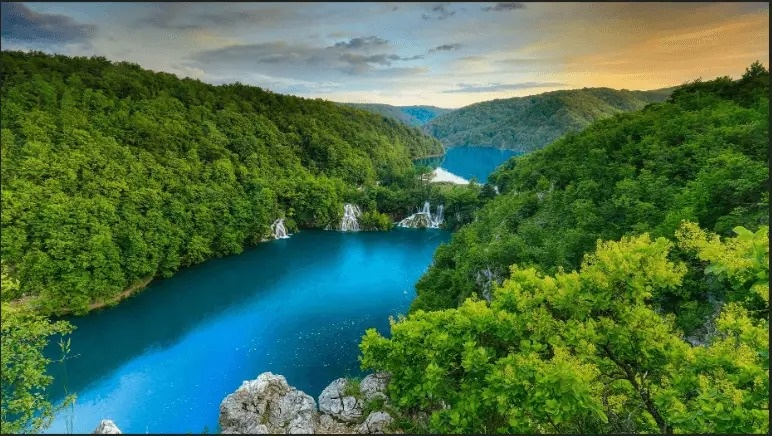

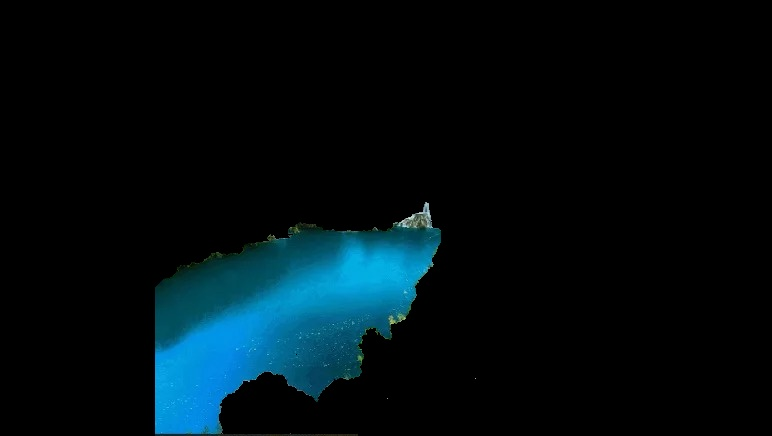

In [ ]:
# Load the image
image = cv2.imread('image.jpeg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Create a mask and initialize it
mask = np.zeros(blurred_img.shape[:2], dtype=np.uint8)

# Define a rectangle around the object to be removed (you can adjust these values)
x = 155
y = 155
width = 350
height = 300
rect = (x, y, width, height)

# Apply GrabCut algorithm
bgdModel = np.zeros((1, 65), dtype=np.float64)
fgdModel = np.zeros((1, 65), dtype=np.float64)
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to classify the regions as either definite background or probable background
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Create a new image with the object removed
removed_object_image = image * mask2[:, :, np.newaxis]

# Save the images to your Colab environment
cv2.imwrite('original_image.jpg', image)
cv2.imwrite('removed_object_image.jpg', removed_object_image)

# Display the images using HTML
from IPython.display import display, Image

display(Image(filename='original_image.jpg'))
display(Image(filename='removed_object_image.jpg'))

